In [5]:
import numpy as np

# Input and output file paths
tbl_file_path = "/ca24/AstroCode-Collective/HD_209458_b_3.11218_5413_51.tbl"
dat_file_path = "/ca24/AstroCode-Collective/HD_209458_b_spectrum_assignment3_taskB.dat"

# Initialize lists to hold data
wavelength, transit_depth, error = [], [], []

# Read and process the .tbl file
with open(tbl_file_path, 'r') as file:
    for line in file:
        if line.startswith("\\") or line.startswith("|") or line.strip() == "":  # Skip metadata and headers
            continue
        cols = line.split()  # Split by whitespace
        try:
            wl = float(cols[0])  # CENTRALWAVELNG (microns)
            depth = float(cols[2]) / 100  # PL_TRANDEP (% to fraction)
            err1 = abs(float(cols[3])) / 100  # PL_TRANDEPERR1 (% to fraction)
            err2 = abs(float(cols[4])) / 100  # PL_TRANDEPERR2 (% to fraction)
            avg_error = (err1 + err2) / 2  # Average error
            wavelength.append(wl)
            transit_depth.append(depth)
            error.append(avg_error)
        except (ValueError, IndexError):
            continue  # Skip invalid rows

# Combine data into a structured array
spectrum_data = np.column_stack((wavelength, transit_depth, error))

# Save the processed data to a .dat file
np.savetxt(
    dat_file_path,
    spectrum_data,
    header="Wavelength(microns)  (Rp/Rs)^2  Error",
    fmt="%.6e"
)

print(f"Processed spectrum data saved to: {dat_file_path}")

Processed spectrum data saved to: /ca24/AstroCode-Collective/HD_209458_b_spectrum_assignment3_taskB.dat


In [4]:
# Quick inspection of the .tbl file
with open("/ca24/AstroCode-Collective/HD_209458_b_3.11218_5413_51.tbl", "r") as f:
    for line in f:
        print(line.strip())


\PL_NAME = HD 209458 b
\SPEC_TYPE = Transmission
\INSTRUMENT = Near Infrared Camera (NIRCam)
\FACILITY = NASA 6.5m James Webb Space Telescope (JWST) Satellite Mission
\NOTE = Figure 6, Sparta pipeline
\REFERENCE = Xue et al. 2024
\
\
|CENTRALWAVELNG|BANDWIDTH|PL_TRANDEP|PL_TRANDEPERR1|PL_TRANDEPERR2|PL_TRANDEPLIM|PL_TRANDEP_AUTHORS|                                                PL_TRANDEP_URL|PL_RATROR|PL_RATRORERR1|PL_RATRORERR2|PL_RATRORLIM|PL_RATROR_AUTHORS|                          PL_RATROR_URL|      PL_RADJ|PL_RADJERR1|PL_RADJERR2|PL_RADJLIM|PL_RADJ_AUTHORS|                            PL_RADJ_URL|PL_TRANMID|PL_TRANMIDERR1|PL_TRANMIDERR2|PL_TRANMIDLIM|     ST_RAD|ST_RADERR1|ST_RADERR2|     ST_RAD_AUTHORS|                                                    ST_RAD_URL|
|        double|   double|    double|        double|        double|         long|              char|                                                          char|   double|       double|       double|        long|  

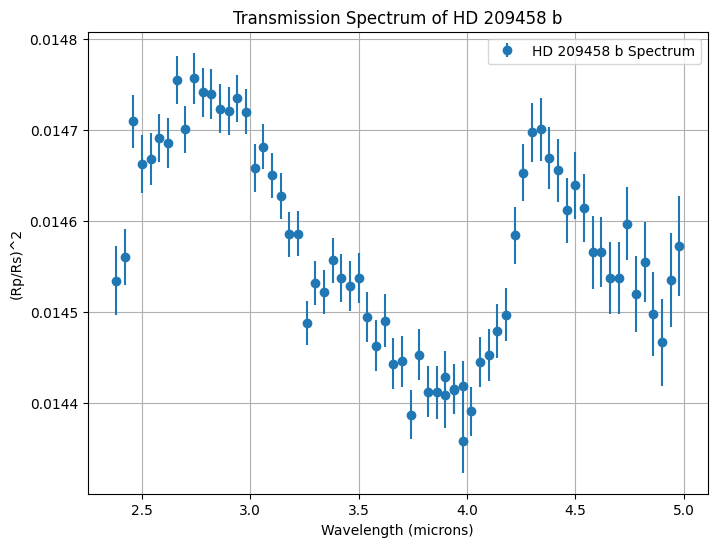

Plot saved to: /ca24/AstroCode-Collective/HD_209458_b_spectrum_assignment3.png


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .dat file
dat_file_path = "/ca24/AstroCode-Collective/HD_209458_b_spectrum_assignment3_taskB.dat"
data = np.loadtxt(dat_file_path, skiprows=1)  # Skip the header row
wavelength = data[:, 0]  # Wavelength column
transit_depth = data[:, 1]  # (Rp/Rs)^2 column
error = data[:, 2]  # Error column

# Plot the spectrum
plt.figure(figsize=(8, 6))
plt.errorbar(wavelength, transit_depth, yerr=error, fmt='o', label='HD 209458 b Spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Transmission Spectrum of HD 209458 b')
plt.legend()
plt.grid(True)

# Save the plot
plot_output_path = "/ca24/AstroCode-Collective/HD_209458_b_spectrum_assignment3.png"
plt.savefig(plot_output_path)
plt.show()

print(f"Plot saved to: {plot_output_path}")


In [8]:
# Report content
report_content = """
Planet Name: HD 209458 b
Article Name: Xue et al. 2024

Star Parameters:
- Host Star: HD 209458
- Stellar Radius: 1.19 ± 0.02 R_sun
- Effective Temperature: ~6091 K

Planet Parameters:
- Planetary Radius: 1.396 ± 0.023 R_J
- Transit Depth: 1.45346% - 1.46972%
- Semi-major Axis: ~0.047 AU
- Orbital Period: ~3.524 days

Atmospheric Composition:
- Primary Components: H2O, CO2, CO, CH4
- Metallicity: High (super-solar)
- C/O Ratio: Low (oxygen-rich)
- Key Findings: No evidence of HCN or C2H2

Reference:
- Bibcode: 2024ApJ...963L...5X
- DOI: https://ui.adsabs.harvard.edu/abs/2024ApJ...963L...5X/abstract
"""

# Save to file
report_file_path = "/ca24/AstroCode-Collective/HD_209458_b_Xue2024_report_assignment3_TaskB.txt"
with open(report_file_path, 'w') as file:
    file.write(report_content)

print(f"Report saved to: {report_file_path}")


Report saved to: /ca24/AstroCode-Collective/HD_209458_b_Xue2024_report_assignment3_TaskB.txt
